In [ ]:
# import os
# os.chdir('/home/reggie/cosmo_learn')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from cosmo_learn.cosmo_learn import *


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/reggie/miniconda3/envs/cosmo/lib/python3.11/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/reggie/miniconda3/envs/cosmo/lib/python3.11/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/home/reggie/miniconda3/envs/cosmo/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/reggie/miniconda3/envs/cosmo/lib/python3.11/site-packages/traitlets/config/application.py", line 10

AttributeError: _ARRAY_API not found

ImportError: initialization failed

### One mock

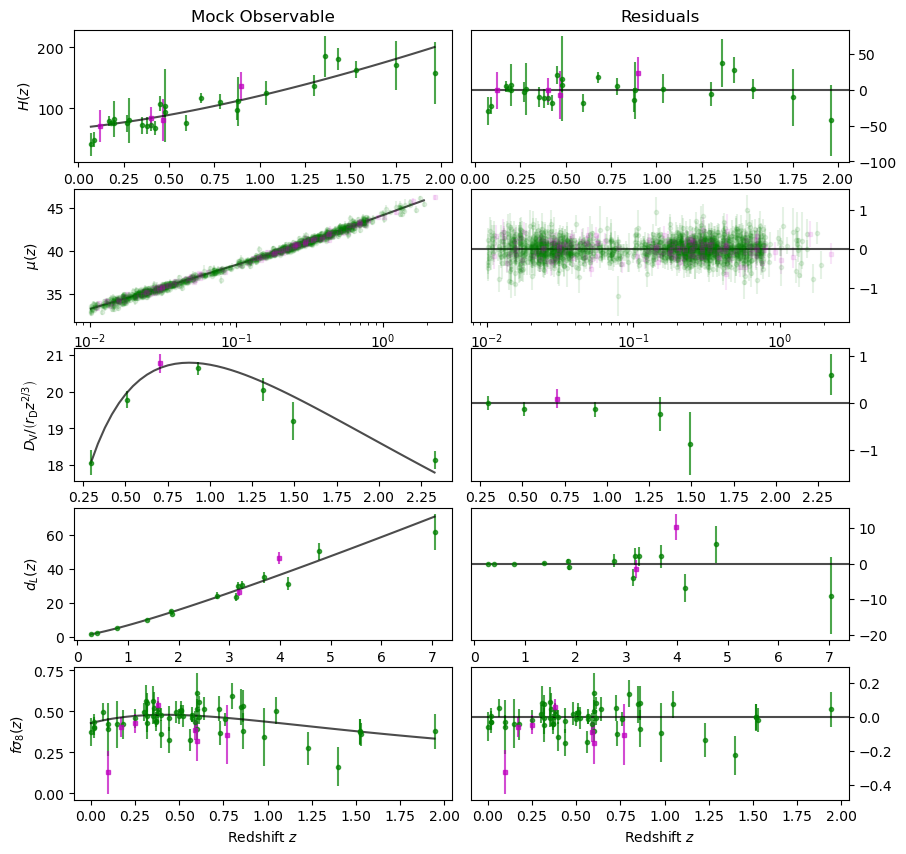

In [2]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, label_train=None, label_test=None)
fig.subplots_adjust(wspace=0.05)
plt.show()

### Multiple mocks, fixed random seed

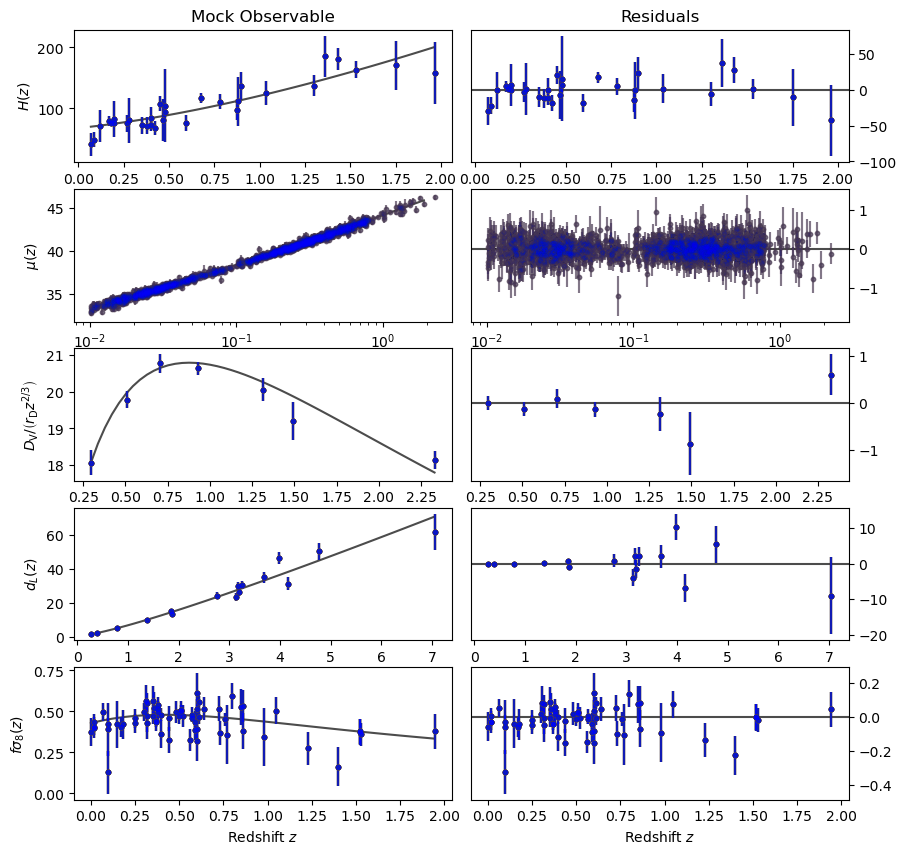

In [3]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, fmt_train='go', fmt_test='go')
fig.subplots_adjust(wspace=0.05)

# loop with fixed random seed
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for rs in range(10):
    my_cosmo_learn_rs=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
    my_cosmo_learn_rs.make_mock(mock_keys=mock_keys)
    color = colors[rs % len(colors)]
    my_cosmo_learn_rs.show_mocks_and_residuals(ax=ax, fmt_train=f'{color}o', fmt_test=f'{color}o')
plt.show()

### Multiple mocks, changing random seed

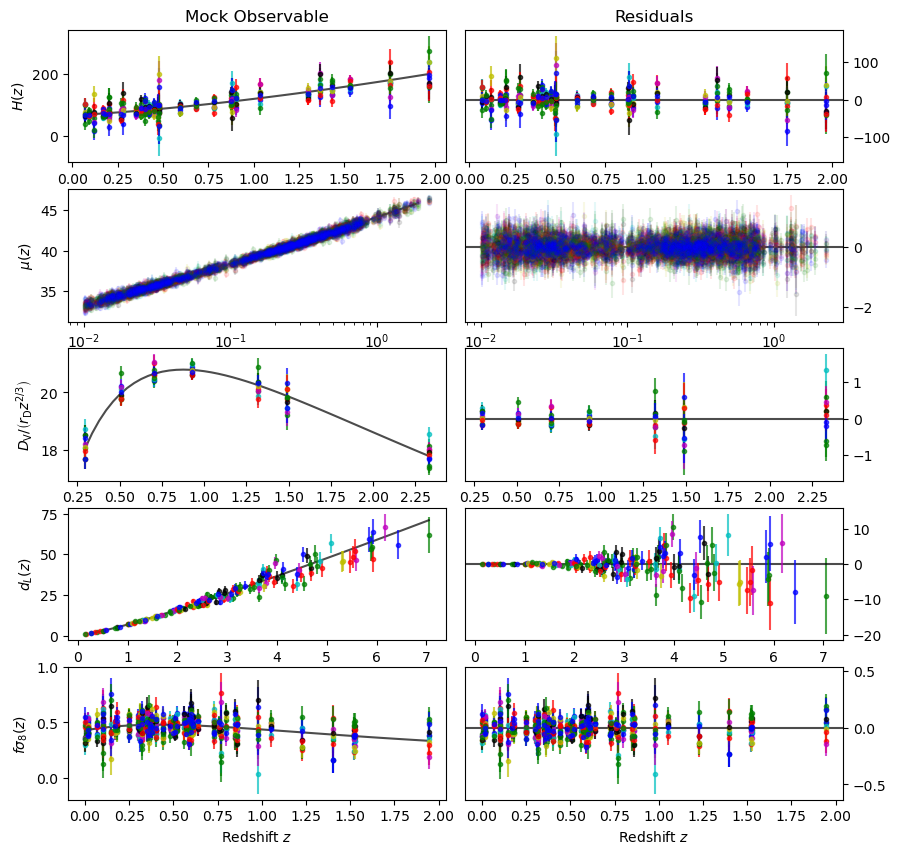

In [4]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, fmt_train='go', fmt_test='go')
fig.subplots_adjust(wspace=0.05)

# loop with changing seed
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for rs in range(10):
    my_cosmo_learn_rs=CosmoLearn([H0, Om0, w0, s8], seed=rs)
    my_cosmo_learn_rs.make_mock(mock_keys=mock_keys)
    color = colors[rs % len(colors)]
    my_cosmo_learn_rs.show_mocks_and_residuals(ax=ax, fmt_train=f'{color}o', fmt_test=f'{color}o')
plt.show()

### GP/BRR Reconstruction

In [3]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']

my_cosmo_learn.make_mock(mock_keys=mock_keys)
my_cosmo_learn.train_gp()
my_cosmo_learn.train_brr()

/home/reggie/miniconda3/envs/cosmo/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/reggie/miniconda3/envs/cosmo/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/reggie/miniconda3/envs/cosmo/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


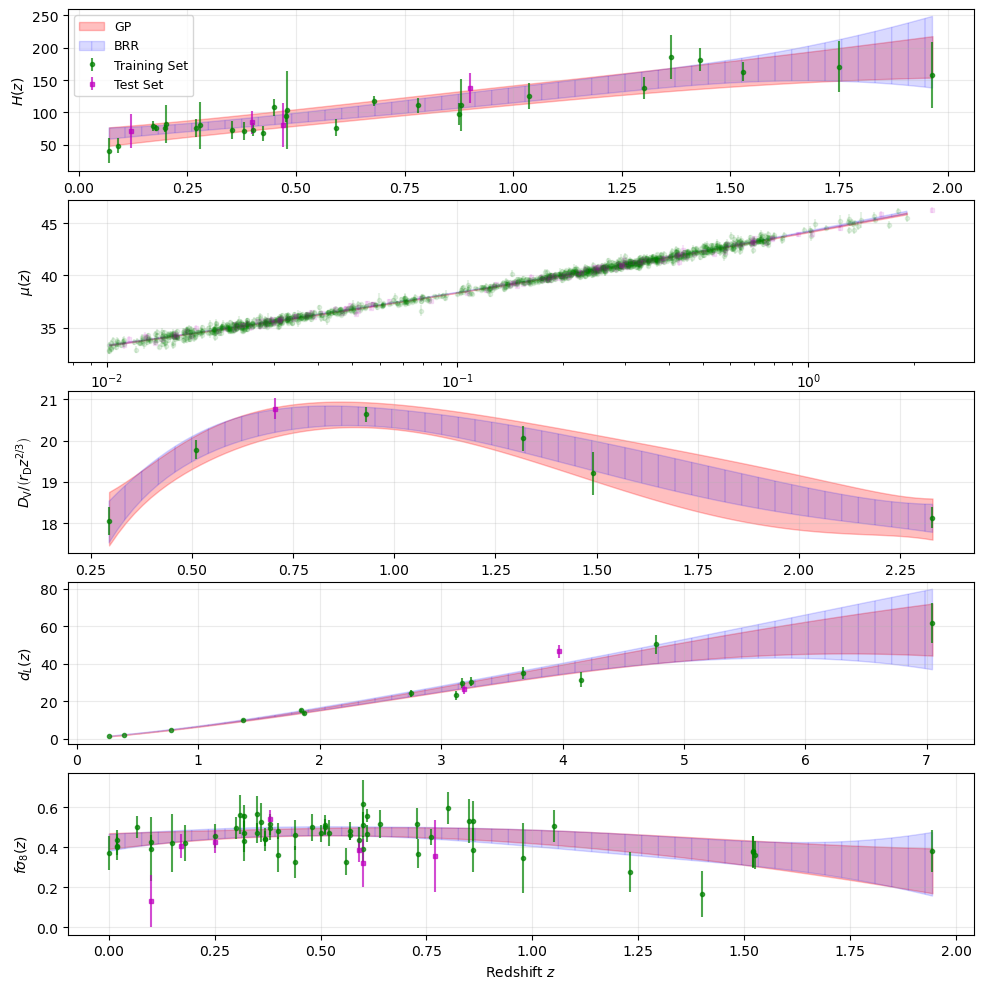

In [4]:
fig, ax=my_cosmo_learn.show_mocks(show_input=False)
my_cosmo_learn.show_trained_ml(ax=ax, method='GP', label='GP')
my_cosmo_learn.show_trained_ml(ax=ax, method='BRR', color='blue', alpha=0.15, hatch='|', label='BRR')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

### ANN

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-12-10 17:17:41.267592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']

my_cosmo_learn.make_mock(mock_keys=mock_keys)

# key='CosmicChronometers'
key='SuperNovae'
# key='BaryonAcousticOscillations'
# key='BrightSirens'
# key='RedshiftSpaceDistorsions'
my_cosmo_learn.mock_data.keys()
train_data=my_cosmo_learn.mock_data[key]['train']
x=train_data['x']; y=np.column_stack((train_data['y'], train_data['yerr']))

In [16]:
# ann=tf.keras.Sequential([Dense(64, activation='relu', input_shape=[1], \
#                                kernel_regularizer=tf.keras.regularizers.l2()), \
#                          Dropout(0.1), \
#                          Dense(64, activation='relu', \
#                                kernel_regularizer=tf.keras.regularizers.l2()), \
#                          Dropout(0.1), Dense(2),])
# ann.compile(optimizer=Adam(learning_rate=0.00008), loss=tf.keras.losses.MeanSquaredError())
# ann.summary()

# for supernovae
ann=tf.keras.Sequential([Dense(512, activation='relu', input_shape=[1], \
                               kernel_regularizer=tf.keras.regularizers.l2()), \
                         Dropout(0.1), \
                         Dense(512, activation='relu', \
                               kernel_regularizer=tf.keras.regularizers.l2()), \
                         Dropout(0.1), Dense(2),])
ann.compile(optimizer=Adam(learning_rate=0.00008), loss=tf.keras.losses.MeanSquaredError())

In [19]:
tf.config.list_physical_devices('GPU')

[]

In [17]:
# ann.fit(x, y, epochs=5000, validation_split=0.1, verbose=1)
ann.fit(np.log10(x), y, epochs=10000, validation_split=0.1, verbose=2)

Epoch 1/10000
41/41 - 1s - loss: 751.3624 - val_loss: 749.4641 - 699ms/epoch - 17ms/step
Epoch 2/10000
41/41 - 0s - loss: 718.5886 - val_loss: 711.8340 - 122ms/epoch - 3ms/step
Epoch 3/10000
41/41 - 0s - loss: 671.4269 - val_loss: 656.0099 - 134ms/epoch - 3ms/step
Epoch 4/10000
41/41 - 0s - loss: 601.9104 - val_loss: 576.1713 - 146ms/epoch - 4ms/step
Epoch 5/10000
41/41 - 0s - loss: 509.7522 - val_loss: 476.2180 - 121ms/epoch - 3ms/step
Epoch 6/10000
41/41 - 0s - loss: 403.3597 - val_loss: 367.5750 - 142ms/epoch - 3ms/step
Epoch 7/10000
41/41 - 0s - loss: 297.2315 - val_loss: 268.1324 - 119ms/epoch - 3ms/step
Epoch 8/10000
41/41 - 0s - loss: 210.9090 - val_loss: 194.3098 - 117ms/epoch - 3ms/step
Epoch 9/10000
41/41 - 0s - loss: 155.6931 - val_loss: 149.3370 - 118ms/epoch - 3ms/step
Epoch 10/10000
41/41 - 0s - loss: 123.3894 - val_loss: 122.2227 - 117ms/epoch - 3ms/step
Epoch 11/10000
41/41 - 0s - loss: 103.3587 - val_loss: 100.1839 - 143ms/epoch - 3ms/step
Epoch 12/10000
41/41 - 0s - l

KeyboardInterrupt: 

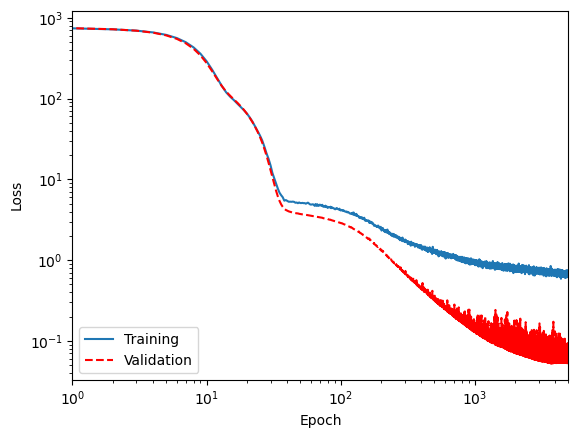

In [12]:
fig, ax=plt.subplots()
ax.plot(ann.history.history['loss'], label='Training')
ax.plot(ann.history.history['val_loss'], 'r--', label='Validation')
ax.set_yscale('log'); ax.set_xscale('log')
ax.set_xlabel('Epoch'); ax.set_ylabel('Loss')
ax.set_xlim(1, ann.history.params['epochs']); ax.legend(loc='lower left', prop={'size': 10})
plt.show()

32/32 [==============================] - 0s 2ms/step


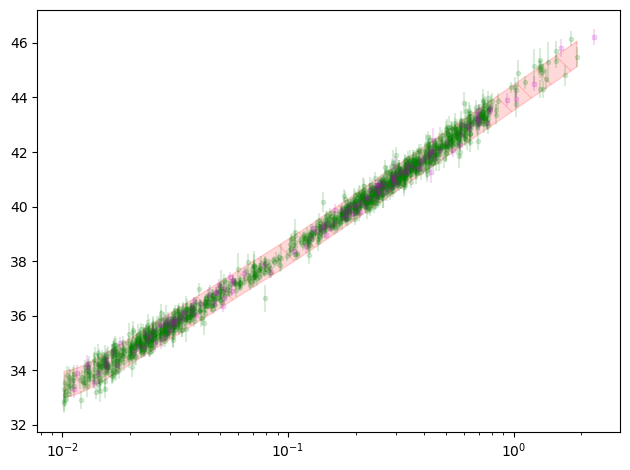

In [15]:
# x_rec=np.linspace(min(x), max(x), 1000)
x_rec=np.linspace(np.log10(min(x)), np.log10(max(x)), 1000)
y_rec = ann.predict(x_rec)
ymean_rec = y_rec[:, 0]; yerr_rec = y_rec[:, 1]


fig, ax=plt.subplots()
# my_cosmo_learn.plot_train_test_data(ax, key, alpha=0.7)
my_cosmo_learn.plot_train_test_data(ax, key, alpha=0.15)
# ax.fill_between(x_rec, ymean_rec-2*yerr_rec, ymean_rec+2*yerr_rec, \
#                 facecolor='red', edgecolor='red', alpha=0.15, hatch='\\', label='ANN')
ax.fill_between(10**x_rec, ymean_rec-2*yerr_rec, ymean_rec+2*yerr_rec, \
                facecolor='red', edgecolor='red', alpha=0.15, hatch='\\', label='ANN')

# for bao below
# gw_cosmo.plot_train_test_data(ax, 'BaryonAcousticOscillations', fmt='.', alpha=0.7)
# ax.fill_between(x_rec, (ymean_rec-yerr_rec)/(x_rec**(2/3)), (ymean_rec+yerr_rec)/(x_rec**(2/3)), \
#                 facecolor='red', edgecolor='red', alpha=0.25, hatch='\\', label='ANN')

# ax.set_xlim(min(x_rec), max(x_rec))
ax.set_xscale('log')
# ax.set_ylabel(r'$H(z)$'); ax.set_xlabel(r'Redshift $z$')
# ax.legend(loc='upper left', prop={'size': 10})
fig.tight_layout()
plt.show()

### MCMC and GA-Fisher

In [5]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

In [6]:
prior_dict={'H0_min': 0, 'H0_max': 100, 'Om0_min': 0, 'Om0_max': 1, \
            'w0_min': -10, 'w0_max': 10, 's8_min': 0.2, 's8_max': 1.5}
rd_fid_prior={'mu': 147.46, 'sigma': 0.28}
llprob=lambda x: my_cosmo_learn.llprob_wcdm(x, prior_dict=prior_dict, rd_fid_prior=rd_fid_prior)

p0=[70, 0.3, -1, 0.8, 147]
nwalkers=15; dres=[0.05, 0.005, 0.01, 0.01, 0.005]; nburn=100; nmcmc=2000
mcmc_samples=my_cosmo_learn.get_mcmc_samples(nwalkers, dres, llprob, p0, nburn=nburn, nmcmc=nmcmc)

Optimizing initial position...
... At [ 68.04925352   0.31506619  -1.04564451   0.8295772  147.54182939]
Running MCMC...


100%|████████████████████████████████████| 2000/2000 [01:04<00:00, 31.18it/s]

Done.
Mean acceptance fraction: 0.5521333333333334
Total time: 67.39121270179749
MCMC result:
    x[0] = 68.06347918648942 + 0.28655010884402543 - 0.2811185543625925
    x[1] = 0.31686319118720496 + 0.013605306792484673 - 0.013948425316764212
    x[2] = -1.0542332935012613 + 0.05863785137745581 - 0.06515818988039657
    x[3] = 0.8287912496856483 + 0.01658402423442018 - 0.014972184752493178
    x[4] = 147.54077721682626 + 0.27103550869367155 - 0.2815618030510052


In [8]:
fitness_func=lambda x: -2*llprob(x)
prior_ga=[[prior_dict['H0_min'], prior_dict['H0_max']], [prior_dict['Om0_min'], prior_dict['Om0_max']], \
          [prior_dict['w0_min'], prior_dict['w0_max']], [prior_dict['s8_min'], prior_dict['s8_max']], \
          [rd_fid_prior['mu']-20*rd_fid_prior['sigma'], rd_fid_prior['mu']+20*rd_fid_prior['sigma']]]

# change ga hyperparameters via my_cosmo_learn.ga_params[key]=new_values
# some defaults: 'max_num_iteration'=1000, 'population_size'=100, 'mutation_probability'=0.3
gaFisher_samples=my_cosmo_learn.get_gaFisher_samples(fitness_func, prior_ga, \
                                                     llprob=llprob, nsamples=(nmcmc-nburn)*nwalkers)

||________________________________________________ 3.9% GA is running...

/home/reggie/miniconda3/envs/cosmo/lib/python3.11/site-packages/geneticalgorithm/geneticalgorithm.py:353: RuntimeWarning: invalid value encountered in subtract
  normobj=maxnorm-normobj+1


|||||||||||||||||||||||||||||||||||||||||||_______ 85.5% GA is running...

/home/reggie/cosmo_learn/cosmo_learn/cosmo_learn.py:203: RuntimeWarning: invalid value encountered in divide
  s8z=sigma8_0*dltz/dlt_0


 The best solution found:                                                                           
 [ 69.04483938   0.35429161  -1.3336168    0.82249637 147.43358604]

 Objective function:
 1519.9197087651914

GA-Fisher result:
    x[0] = 69.0470179859868 + 0.31705066800222426 - 0.31340337956058306
    x[1] = 0.35462104654991433 + 0.01218747688560129 - 0.01228360790023103
    x[2] = -1.3352913487691107 + 0.08140637772355297 - 0.08107714448767345
    x[3] = 0.8225741694272922 + 0.015273879054125694 - 0.015315796493960532
    x[4] = 147.4309841182726 + 0.27198177755855113 - 0.2701740303069471


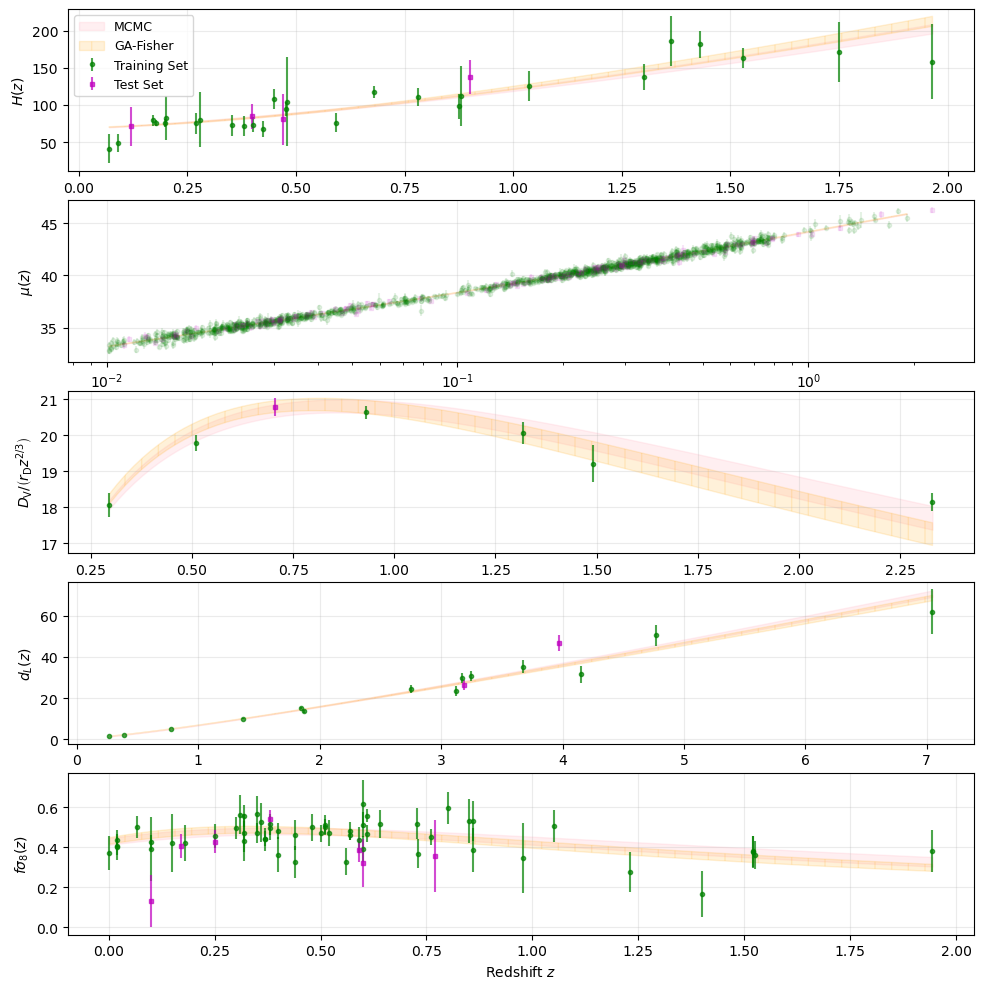

In [9]:
fig, ax=my_cosmo_learn.show_mocks(show_input=False)
my_cosmo_learn.show_bestfit_curve(ax=ax, method='MCMC', label='MCMC', color='pink')
my_cosmo_learn.show_bestfit_curve(ax=ax, method='GAFisher', color='orange', alpha=0.15, hatch='|', label='GA-Fisher')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

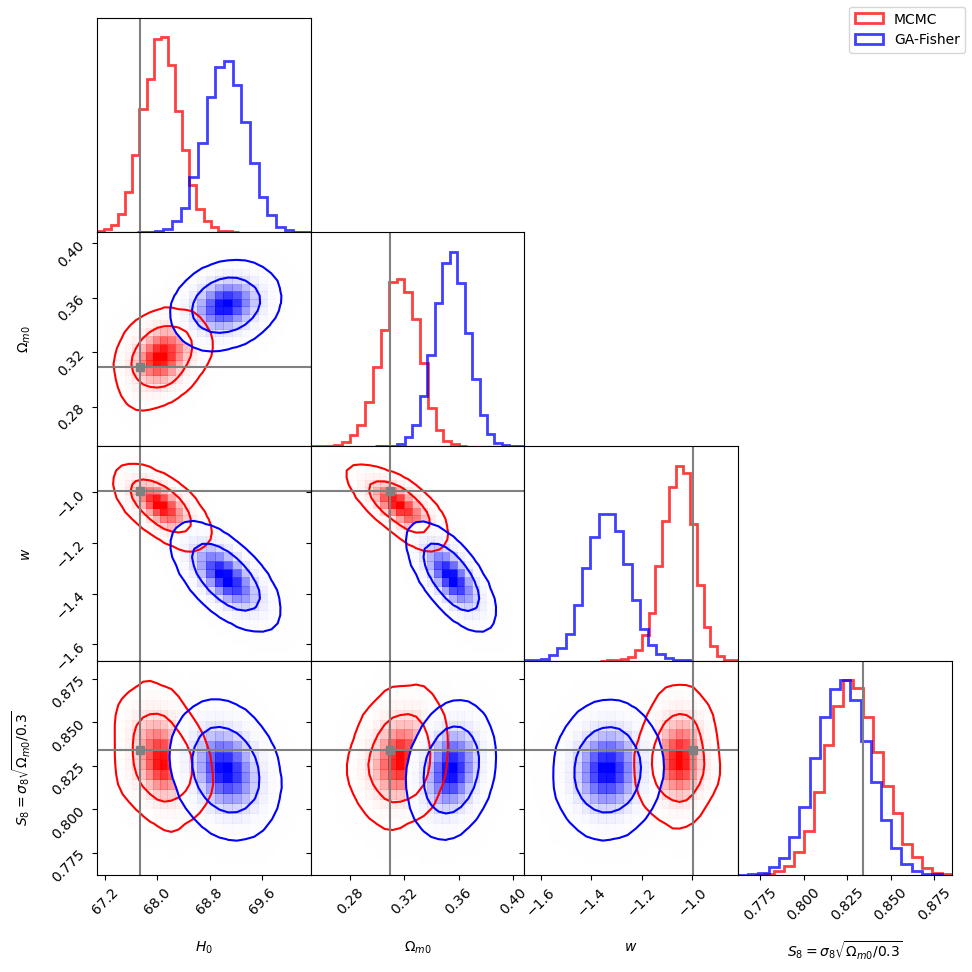

In [10]:
corner_plot = my_cosmo_learn.show_param_posterior(method='MCMC')
my_cosmo_learn.show_param_posterior(method='GAFisher', fig=corner_plot, color='blue', show_truth=True)

corner_plot.legend(['MCMC', 'GA-Fisher'], loc='upper right')
corner_plot.tight_layout(); corner_plot.subplots_adjust(hspace=0, wspace=0)
plt.show()